In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [2]:
train_log=torch.load(r'C:\Users\stone\Temporal_thermal_image\train_log.pt')
val_log=torch.load(r'C:\Users\stone\Temporal_thermal_image\val_log.pt')

In [3]:
train_log_compact=torch.load(r'C:\Users\stone\Temporal_thermal_image\train_log_compact_unet.pt')
val_log_compact=torch.load(r'C:\Users\stone\Temporal_thermal_image\val_log_compact_unet.pt')

In [4]:
train_log_big=torch.load(r'C:\Users\stone\Temporal_thermal_image\train_log_unet_small_kernel_big_dataset.pt')
val_log_big=torch.load(r'C:\Users\stone\Temporal_thermal_image\val_log_unet_small_kernel_big_dataset.pt')

In [5]:
train_log_smarter=torch.load(r'C:\Users\stone\Temporal_thermal_image\train_log_unet_small_kernel_smarter_big_dataset.pt')
val_log_smarter=torch.load(r'C:\Users\stone\Temporal_thermal_image\val_log_unet_small_kernel_smarter_big_dataset.pt')

(0.0, 120.0)

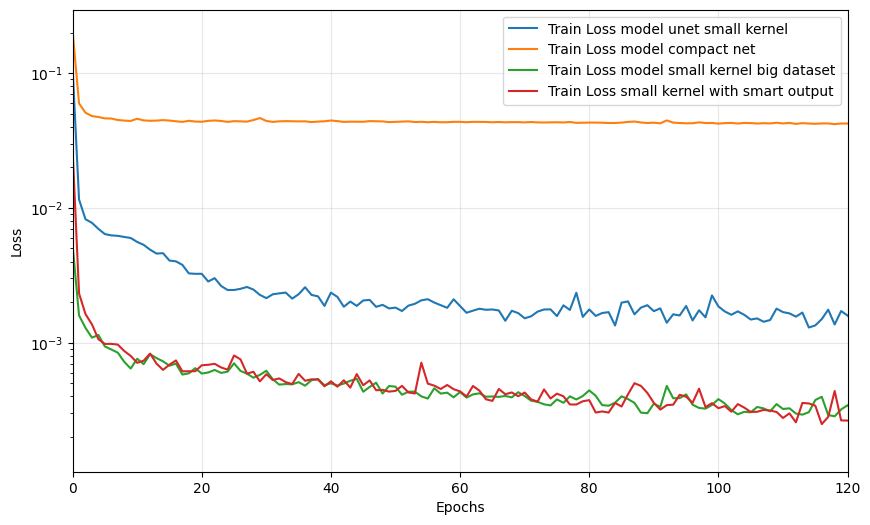

In [6]:
plt.figure(figsize=(10,6))
plt.semilogy(train_log,label='Train Loss model unet small kernel')
# plt.semilogy(val_log,label='Validation Loss model unet small kernel')
plt.semilogy(train_log_compact,label='Train Loss model compact net')
# plt.semilogy(val_log_compact,label='Validation Loss model compact net')
plt.semilogy(train_log_big,label='Train Loss model small kernel big dataset')
# plt.semilogy(val_log_big,label='Validation Loss model small kernel big dataset')
plt.semilogy(train_log_smarter,label='Train Loss small kernel with smart output')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,120)

(0.0, 130.0)

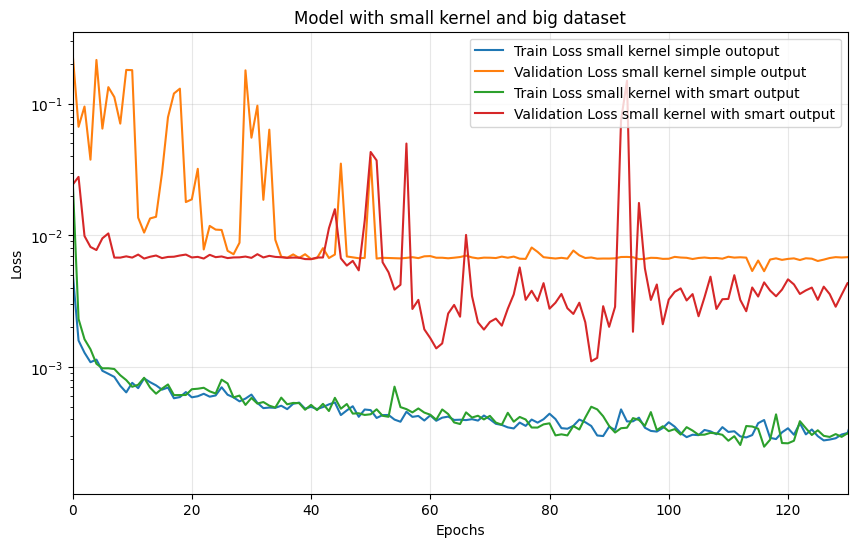

In [7]:
plt.figure(figsize=(10,6))
plt.semilogy(train_log_big,label='Train Loss small kernel simple outoput')
plt.semilogy(val_log_big,label='Validation Loss small kernel simple output')
plt.semilogy(train_log_smarter,label='Train Loss small kernel with smart output')
plt.semilogy(val_log_smarter,label='Validation Loss small kernel with smart output')
plt.title('Model with small kernel and big dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0,130)

In [8]:
from torch.utils.data import DataLoader
from helper_functions.helper_functions import RandomHorizontalFlipBscan, NoiseAddition
from data.data_operators import BScanDepthDataset, ComposeBScanTransforms
from networks.Unets import BnetSmallKernel, BnetBigKernel, BnetMean,CompactBnet
from tqdm import tqdm

c:\Users\stone\Temporal_thermal_image\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
test_dataset = BScanDepthDataset(
        bscan_dir=r"E:\Simulated_and_experimental_data\Synthetic_data\B-scans_test\data",
        depth_dir=r"E:\Simulated_and_experimental_data\Synthetic_data\B-scans_test\depth",
        transform=None,
        normalization_path=r"C:\Users\stone\Temporal_thermal_image\normalization_params.npz"
    )

In [ ]:
test_loader = DataLoader(test_dataset,batch_size=1)

In [ ]:
# test_iter = iter(test_loader)

# sample1 = next(test_iter)
# sample2=next(test_iter)
# sample3=next(test_iter)
# last_batch = None
# for last_batch in test_loader:
#     pass

In [49]:
model=CompactBnet()
state_dict = torch.load(r"C:\Users\stone\Temporal_thermal_image\Compact_Unet.pth")
model.load_state_dict(state_dict)
model.eval()

CompactBnet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(5, 3), stride=(2, 1), padding=(2, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 64, kernel_size=(5, 3), stride=(2, 1), padding=(2, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 64, kernel_size=(5, 3), stride=(2, 1), padding=(2, 1))
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
  )
  (vertical_proj): AdaptiveAvgPool2d(output_size=(1, None))
  (regressor): Sequential(
    (0): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
    (1): ReLU(inplace=True)
    (2): Conv1d(32,

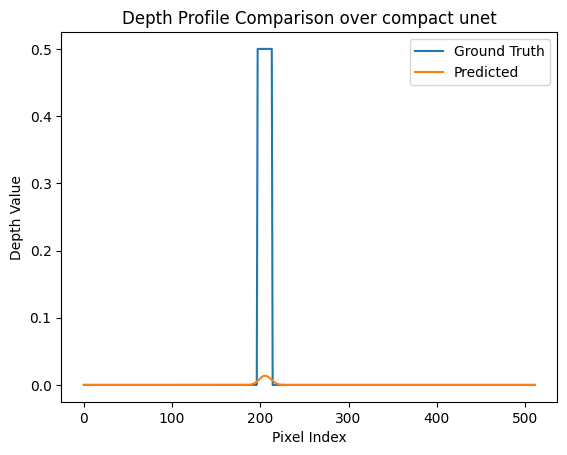

In [51]:
plt.plot(last_batch[1][0].cpu().numpy().flatten(),label='Ground Truth')
plt.plot(output[0].detach().cpu().numpy().flatten(),label='Predicted')
plt.xlabel('Pixel Index') 
plt.ylabel('Depth Value')
plt.title('Depth Profile Comparison over compact unet')
plt.legend()

In [23]:
model=BnetSmallKernel()
state_dict = torch.load(r"C:\Users\stone\Temporal_thermal_image\Unet_small_kernel_l2_both_classes.pth")
model.load_state_dict(state_dict)
model.eval()
# output=model(sample3[0])

BnetSmallKernel(
  (unet): Unet(
    (encoder): ResNetEncoder(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): 

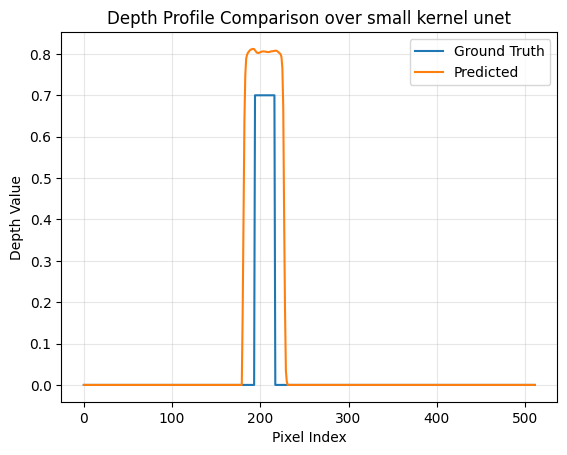

In [41]:
plt.plot(sample3[1][0].cpu().numpy().flatten(),label='Ground Truth')
plt.plot(output[0].detach().cpu().numpy().flatten(),label='Predicted')
plt.xlabel('Pixel Index') 
plt.ylabel('Depth Value')
plt.title('Depth Profile Comparison over small kernel unet')
plt.legend()
plt.grid(alpha=0.3)

In [25]:
from networks.Unets import BnetSmallKernelSmarter
model=BnetSmallKernelSmarter()
state_dict = torch.load(r"C:\Users\stone\Temporal_thermal_image\Unet_small_kernel_smarter_l2_both_classes.pth")
model.load_state_dict(state_dict)
model.eval()
# output=model(sample3[0])

BnetSmallKernelSmarter(
  (unet): Unet(
    (encoder): ResNetEncoder(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          

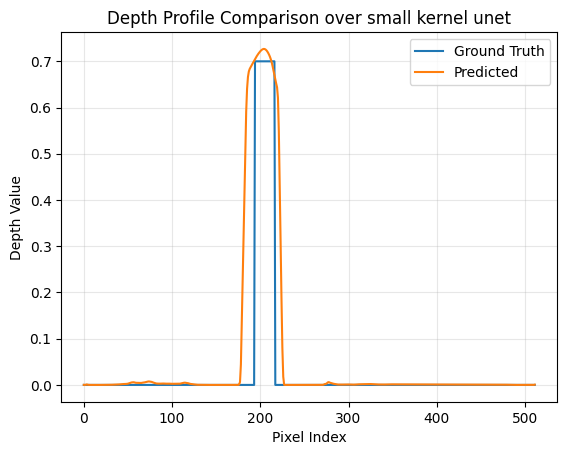

In [43]:
plt.plot(sample3[1][0].cpu().numpy().flatten(),label='Ground Truth')
plt.plot(output[0].detach().cpu().numpy().flatten(),label='Predicted')
plt.xlabel('Pixel Index') 
plt.ylabel('Depth Value')
plt.title('Depth Profile Comparison over small kernel unet')
plt.legend()
plt.grid(alpha=0.3)

<h1>Global MSE and RMSE and MAE

In [28]:
with torch.no_grad():
    total_metric = 0
    total_mae=0
    for batch in test_loader:
        output = model(batch[0])
        metric = torch.mean((batch[1] - output) ** 2)
        mae_metric = torch.mean(torch.abs(batch[1] - output))
        total_mae += mae_metric.item()
        total_metric += metric.item()

    total_metric = total_metric / len(test_loader)
    total_mae = total_mae / len(test_loader)
print(f"Average MSE on the test set: {total_metric:.4f}")
print(f"RMSE on the test set: {total_metric**0.5:.4f}")
print(f"Average MAE on the test set: {total_mae:.4f}")

Average MSE on the test set: 0.0032
RMSE on the test set: 0.0562
Average MAE on the test set: 0.0111


<h1> Baseline calculation

In [21]:

total_sq_error = 0
total_elements = 0

for batch in test_loader:
    targets = batch[1]

    # Baseline prediction = mean of the targets
    baseline_pred = torch.full_like(targets, torch.mean(targets))
    sq_error = (targets - baseline_pred) ** 2

    total_sq_error += sq_error.sum().item()
    total_elements += sq_error.numel()

mse_baseline = total_sq_error / total_elements
rmse_baseline = mse_baseline ** 0.5

print(f"Baseline MSE: {mse_baseline:.4f}")
print(f"Baseline RMSE: {rmse_baseline:.4f}")

Baseline MSE: 0.0271
Baseline RMSE: 0.1647


<h1>R2 calcualtion over whole length

In [24]:
with torch.no_grad():
    r2_metric=0
    for batch in test_loader:
        output = model(batch[0])
        ss_res = torch.sum((batch[1] - output) ** 2)
        ss_tot = torch.sum((batch[1] - torch.mean(batch[1])) ** 2) # i can use it as my dataloader only provide one batch of data every time
        r2 = 1 - ss_res / ss_tot
        r2_metric += r2.item()
print(f"Average R² on the test set: {r2_metric / len(test_loader):.4f}")

Average R² on the test set: 0.7138


<h1>Masked RMSE

In [27]:
with torch.no_grad():
    padding = 50
    total_metric = 0.0  # model MSE
    baseline_metric = 0.0
    r2_metric = 0.0
    num_samples = 0

    for batch in test_loader:
        inputs, targets = batch  # shape: (B, W)
        outputs = model(inputs)
        B, W = targets.shape
        k=0
        for i in range(B):
            # Get defect indices per sample
            indices = torch.where(targets[i] > 0)[0]
            if len(indices) == 0:
                continue
            print(k)
            k=k+1
            x0 = max(0, indices[0]-padding)
            x1 = min(W, indices[-1]+padding)

            gt_slice = targets[i, x0:x1]
            output_slice = outputs[i, x0:x1]

            # Model MSE
            mse_model = torch.mean((gt_slice - output_slice)**2)
            total_metric += mse_model.item()

            # Baseline MSE (predict mean of gt_slice)
            baseline_pred = torch.full_like(gt_slice, torch.mean(gt_slice))
            mse_baseline = torch.mean((gt_slice - baseline_pred)**2)
            baseline_metric += mse_baseline.item()

            # R²
            ss_res = torch.sum((gt_slice - output_slice)**2)
            ss_tot = torch.sum((gt_slice - torch.mean(gt_slice))**2)
            r2 = 1 - ss_res / ss_tot
            r2_metric += r2.item()

            num_samples += 1

    # Average metrics
    total_metric /= num_samples
    baseline_metric /= num_samples
    r2_metric /= num_samples

print(f"Average MSE on the test set (focused on non-zero regions): {total_metric:.4f}")
print(f"RMSE on the test set (focused on non-zero regions): {total_metric**0.5:.4f}")
print(f"Baseline MSE (focused on non-zero regions): {baseline_metric:.4f}")
print(f"Baseline RMSE (focused on non-zero regions): {baseline_metric**0.5:.4f}")
print(f"R2 Score on the test set (focused on non-zero regions): {r2_metric:.4f}")

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Average MSE on the test set (focused on non-zero regions): 0.0124
RMSE on the test set (focused on non-zero regions): 0.1115
Baseline MSE (focused on non-zero regions): 0.0748
Baseline RMSE (focused on non-zero regions): 0.2735
R2 Score on the test set (focused on non-zero regions): 0.8019
